<a href="https://colab.research.google.com/github/Salmaelghefyry/Horloge-Graphique/blob/main/salma_elghefyry_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from scipy.cluster.hierarchy import dendrogram, linkage


# Loading MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data

print("Dataset Loaded: MNIST")
print("Shape of dataset:", X.shape)


Dataset Loaded: MNIST
Shape of dataset: (70000, 784)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

print("Dimensionality Reduced: Now Shape =", X_pca.shape)

Dimensionality Reduced: Now Shape = (70000, 50)


In [ ]:
sse = []
list_k = list(range(1, 20))  # Limit to 20 clusters for efficiency

for k in list_k:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

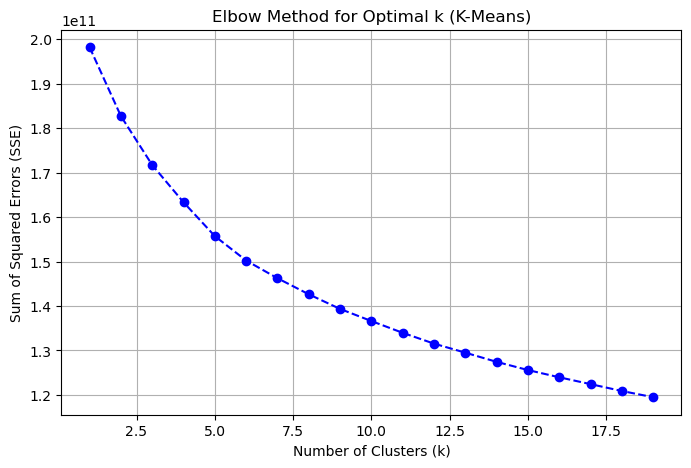

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(list_k, sse, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal k (K-Means)")
plt.grid()
plt.show()

In [ ]:
optimal_k = 10
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_pca)

print("K-Means Clustering Done with", optimal_k, "Clusters")

K-Means Clustering Done with 10 Clusters


In [ ]:
X_sample = X_pca[:2000]

# Perform Agglomerative Clustering
HAC_model = AgglomerativeClustering(n_clusters=optimal_k, linkage="ward")
clusters_hca = HAC_model.fit_predict(X_sample)

print("Hierarchical Clustering Done with", optimal_k, "Clusters")

Hierarchical Clustering Done with 10 Clusters


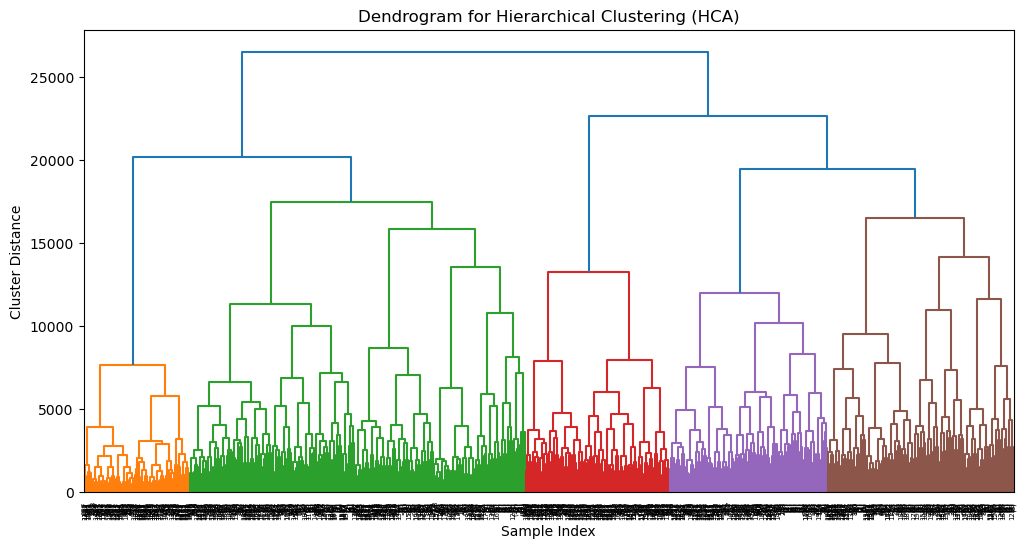

In [ ]:
linkage_matrix = linkage(X_sample, method="ward")

# Plot Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=10)  # Show only top levels
plt.title("Dendrogram for Hierarchical Clustering (HCA)")
plt.xlabel("Sample Index")
plt.ylabel("Cluster Distance")
plt.show()